In [10]:
########## Settings ##########
import os
import sys
from dotenv import load_dotenv

def GetRoot() -> None:
    """
    Set the root directory of the project.
    Usage in Python script:
    GetRoot()
    root = os.environ['PROJECT_ROOT']
    :return:None
    """
    # Allow to use the ".env" file
    load_dotenv()

    abs_path = os.path.abspath(os.getcwd())
    project_root = os.path.dirname(abs_path)
    os.environ['PROJECT_ROOT'] = project_root
    return None

def GetModule() -> None:
    # get the root directory of this project
    GetRoot()

    # get and set the environment variables
    python_path = os.environ.get('PYTHONPATH')
    if python_path:
        for path in python_path.split(':'):
            path = str(os.environ['PROJECT_ROOT']) + path
            if path not in sys.path:
                sys.path.append(path)
    return None

# Get the project root and load environment variables
GetModule()

########## Import Packages ##########
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
########## Self Defined Functions ##########
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_loss = tf.square(predictions - targets)
    return tf.reduce_mean(per_sample_loss)

def training_step(inputs, targets, learning_rate):
    # Execute the forward propagation in the gradient tape block 
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    # Compute the gradient of loss to weight W and b
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    
    # Update weights
    W.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss



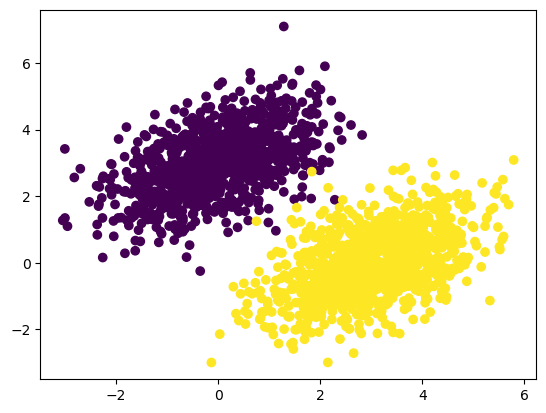

In [12]:
# Create the positive and the negative data
# Define two types of data
int_data_num = 1000
positive_data = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1.0, 0.5], [0.5, 1.0]],
    size=int_data_num
)
negative_data = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1.0, 0.5], [0.5, 1.0]],
    size=int_data_num
)

# Create a new metrix
inputs = np.vstack((positive_data, negative_data)).astype(np.float32)
targets = np.vstack((np.zeros((int_data_num, 1), dtype="float32"),
    np.ones((int_data_num, 1), dtype="float32")))

# Plot the data
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [21]:
# Create a linear classifier
# Define the dimension
int_dim_input = 2
int_dim_output = 1

# Initialize the weights and the bias 
W = tf.Variable(initial_value=tf.random.uniform(shape=(int_dim_input, int_dim_output)))
b = tf.Variable(initial_value=(tf.zeros(shape=(int_dim_output,))))

# Training
learning_rate = 0.1
epochs = 100
for step in range(epochs):
    loss = training_step(
        inputs=inputs,
        targets=targets,
        learning_rate=learning_rate
    )
    print(f"Loss as step {step+1}: {loss:.4f}")

Loss as step 1: 3.7272
Loss as step 2: 0.3657
Loss as step 3: 0.1556
Loss as step 4: 0.1236
Loss as step 5: 0.1126
Loss as step 6: 0.1047
Loss as step 7: 0.0977
Loss as step 8: 0.0913
Loss as step 9: 0.0855
Loss as step 10: 0.0803
Loss as step 11: 0.0754
Loss as step 12: 0.0710
Loss as step 13: 0.0670
Loss as step 14: 0.0634
Loss as step 15: 0.0600
Loss as step 16: 0.0570
Loss as step 17: 0.0542
Loss as step 18: 0.0517
Loss as step 19: 0.0494
Loss as step 20: 0.0472
Loss as step 21: 0.0453
Loss as step 22: 0.0436
Loss as step 23: 0.0420
Loss as step 24: 0.0405
Loss as step 25: 0.0392
Loss as step 26: 0.0380
Loss as step 27: 0.0368
Loss as step 28: 0.0358
Loss as step 29: 0.0349
Loss as step 30: 0.0341
Loss as step 31: 0.0333
Loss as step 32: 0.0326
Loss as step 33: 0.0320
Loss as step 34: 0.0314
Loss as step 35: 0.0309
Loss as step 36: 0.0304
Loss as step 37: 0.0299
Loss as step 38: 0.0295
Loss as step 39: 0.0292
Loss as step 40: 0.0288
Loss as step 41: 0.0285
Loss as step 42: 0.0282
L

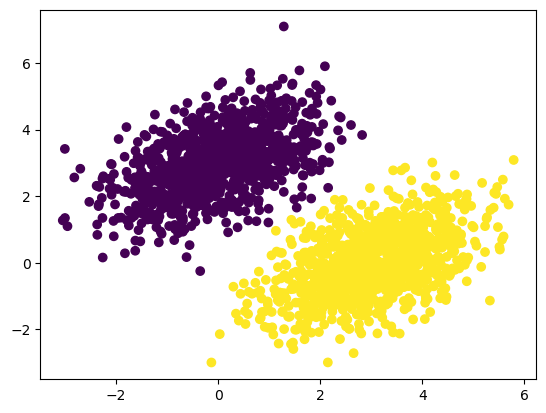

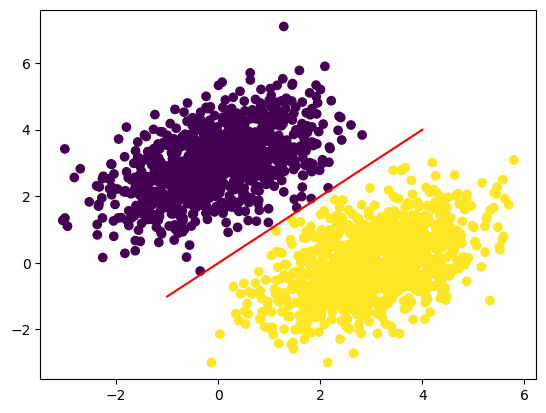

In [23]:
# Predict
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

# Visualize the classifier
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5-b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)